#### <center>Introduction<center>
We'll work on California Housing Prices dataset.The data is obtained from the statlib repository and contains information from the 1990 California census. The objective is to build a model of housing prices in California.

#### <center> Microsoft Team Data Science Process<center>

<div>
   <img src="attachment:tdsp-lifecycle2.png" width="600">
</div>

<div>
   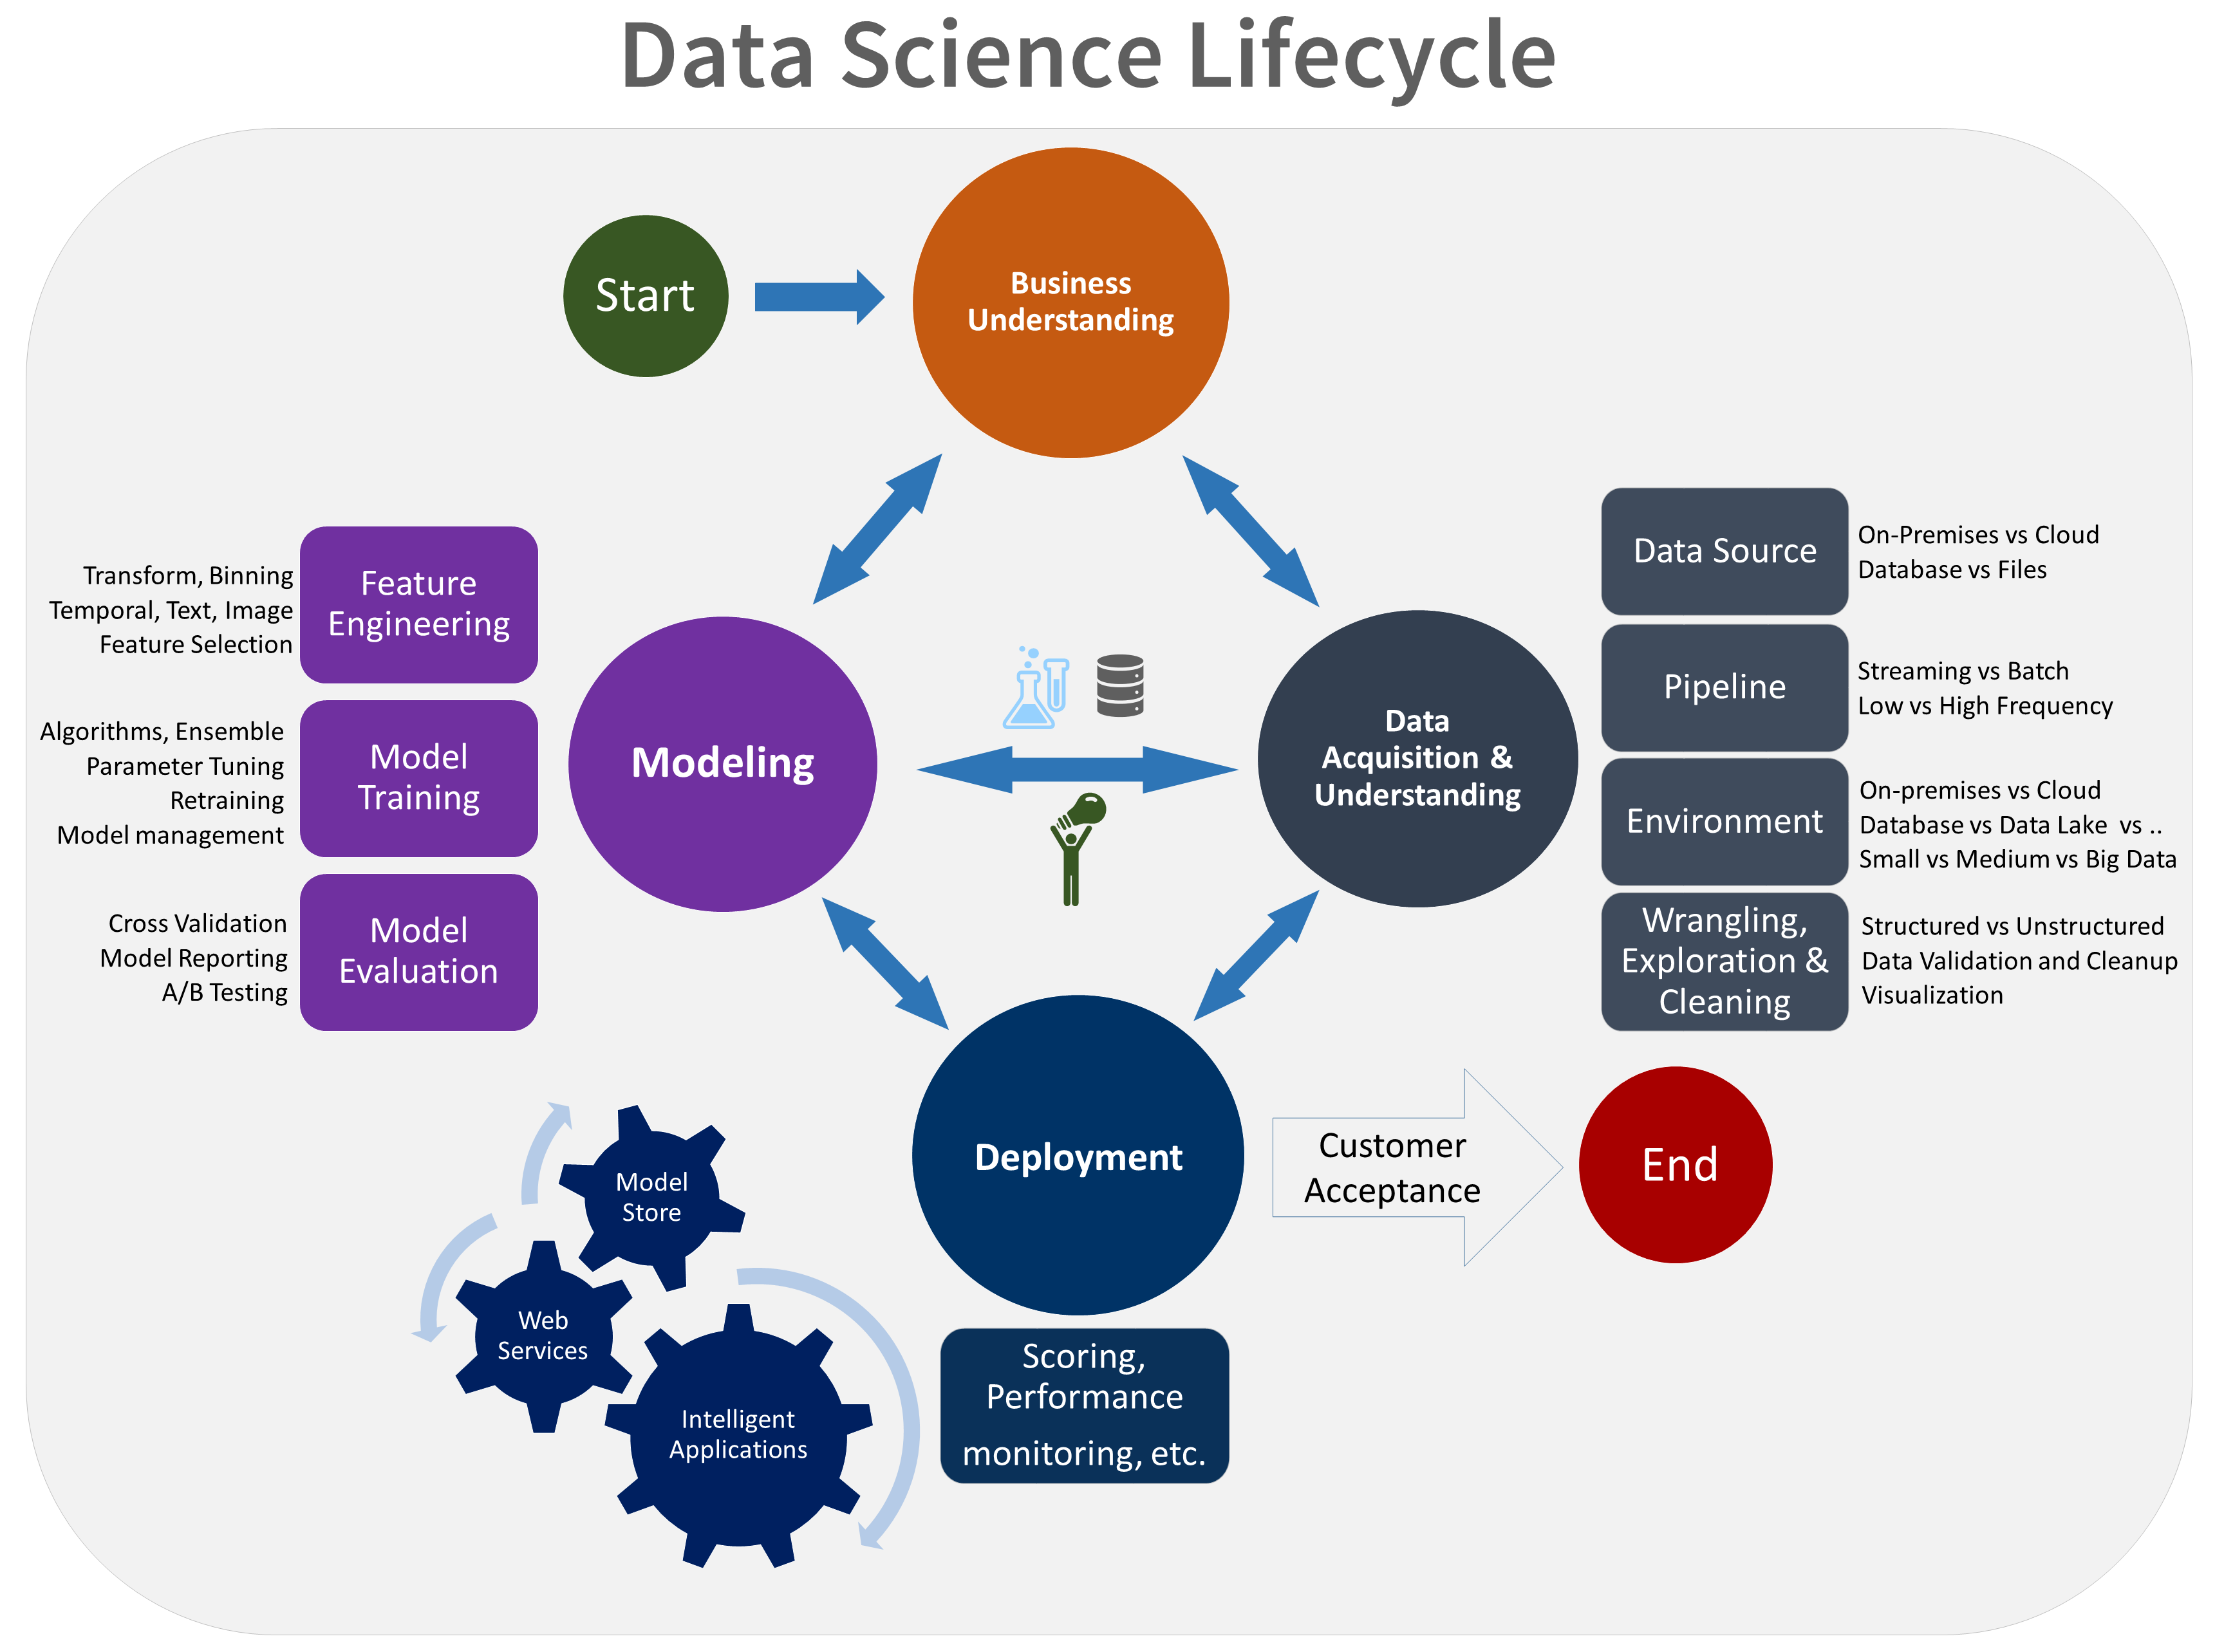
</div>

<div>
   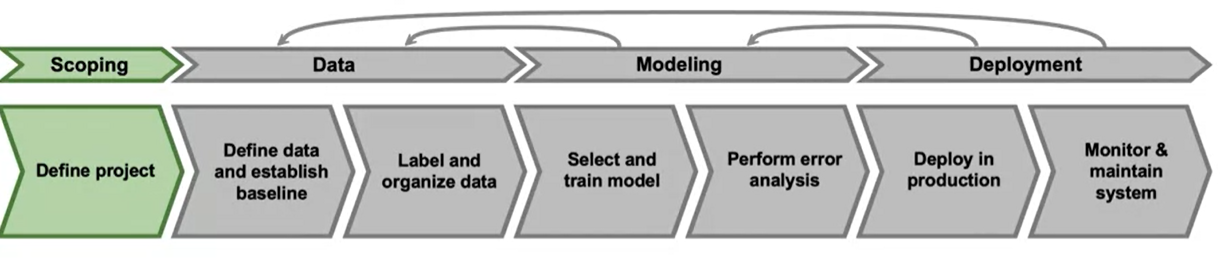
</div>

In [2]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy as np
print('numpy: %s' % np.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# matplotlib
import matplotlib as plt
print('matplotlib: %s' % plt.__version__)
# pandas
import pandas as pd
print('pandas: %s' % pd.__version__)

scipy: 1.4.1
numpy: 1.19.4
sklearn: 0.23.2
matplotlib: 3.1.3
pandas: 1.3.2


Load data from: https://raw.githubusercontent.com/arkhur/Data-science-learning-group/main/datasets/housing.csv

In [3]:
import os
os.environ['https_proxy'] = "set https_proxy=http://test-proxy:80"
os.environ['http_proxy'] = "set http_proxy=http://test-proxy:80"
HOUSING_URL = "https://raw.githubusercontent.com/arkhur/Data-science-learning-group/main/datasets/housing.csv"

Note: If the above doesn't work then you can download the data on your system(save as csv) and then use pd.read_csv and give file path

In [4]:
housing= pd.read_csv(HOUSING_URL)

This will feate a dataframe which is 2D tabular data format containing rows and columns

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


One column looks object and others are all numerical

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
pd.options.display.float_format = "{:,.2f}".format

Let's use a method describe for checking the distribution of numerical data 

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,433.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,-119.57,35.63,28.64,"2,635.76",537.87,"1,425.48",499.54,3.87,"206,855.82"
std,2.00,2.14,12.59,"2,181.62",421.39,"1,132.46",382.33,1.90,"115,395.62"
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,"14,999.00"
25%,-121.80,33.93,18.00,"1,447.75",296.00,787.00,280.00,2.56,"119,600.00"
50%,-118.49,34.26,29.00,"2,127.00",435.00,"1,166.00",409.00,3.53,"179,700.00"
75%,-118.01,37.71,37.00,"3,148.00",647.00,"1,725.00",605.00,4.74,"264,725.00"
max,-114.31,41.95,52.00,"39,320.00","6,445.00","35,682.00","6,082.00",15.00,"500,001.00"


The count, mean, min, and max rows are self-explanatory. The std row shows the standard deviation, which measures how dispersed the values are.The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

Extension of describe- Want to look at some more percentiles values

In [10]:
housing.describe(percentiles=[.005,.01,0.05,0.1,0.25,0.5,.75,.90,.950,.990,.995,.999])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,433.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,-119.57,35.63,28.64,"2,635.76",537.87,"1,425.48",499.54,3.87,"206,855.82"
std,2.00,2.14,12.59,"2,181.62",421.39,"1,132.46",382.33,1.90,"115,395.62"
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,"14,999.00"
0.5%,-124.08,32.62,3.00,81.39,18.00,49.20,17.00,0.92,"45,500.00"
1%,-123.22,32.68,4.00,164.00,36.00,88.00,31.00,1.07,"50,000.00"
5%,-122.47,32.82,8.00,620.95,137.00,348.00,125.00,1.60,"66,200.00"
10%,-122.29,33.63,13.00,941.00,198.00,510.00,184.00,1.90,"82,300.00"
25%,-121.80,33.93,18.00,"1,447.75",296.00,787.00,280.00,2.56,"119,600.00"
50%,-118.49,34.26,29.00,"2,127.00",435.00,"1,166.00",409.00,3.53,"179,700.00"


In [11]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Function to calculate % missing 

In [12]:
##Missing%##########
def missing(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent_missing = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(3)
    return pd.concat([total, percent_missing], axis=1, keys=['Total', 'Percent_missing'])

In [13]:
missing(housing)

,Total,Percent_missing
total_bedrooms,207,1.00
longitude,0,0.00
latitude,0,0.00
housing_median_age,0,0.00
total_rooms,0,0.00
population,0,0.00
households,0,0.00
median_income,0,0.00
median_house_value,0,0.00
ocean_proximity,0,0.00


### <center> Exploratory Data Analysis <center>

Univariate plots

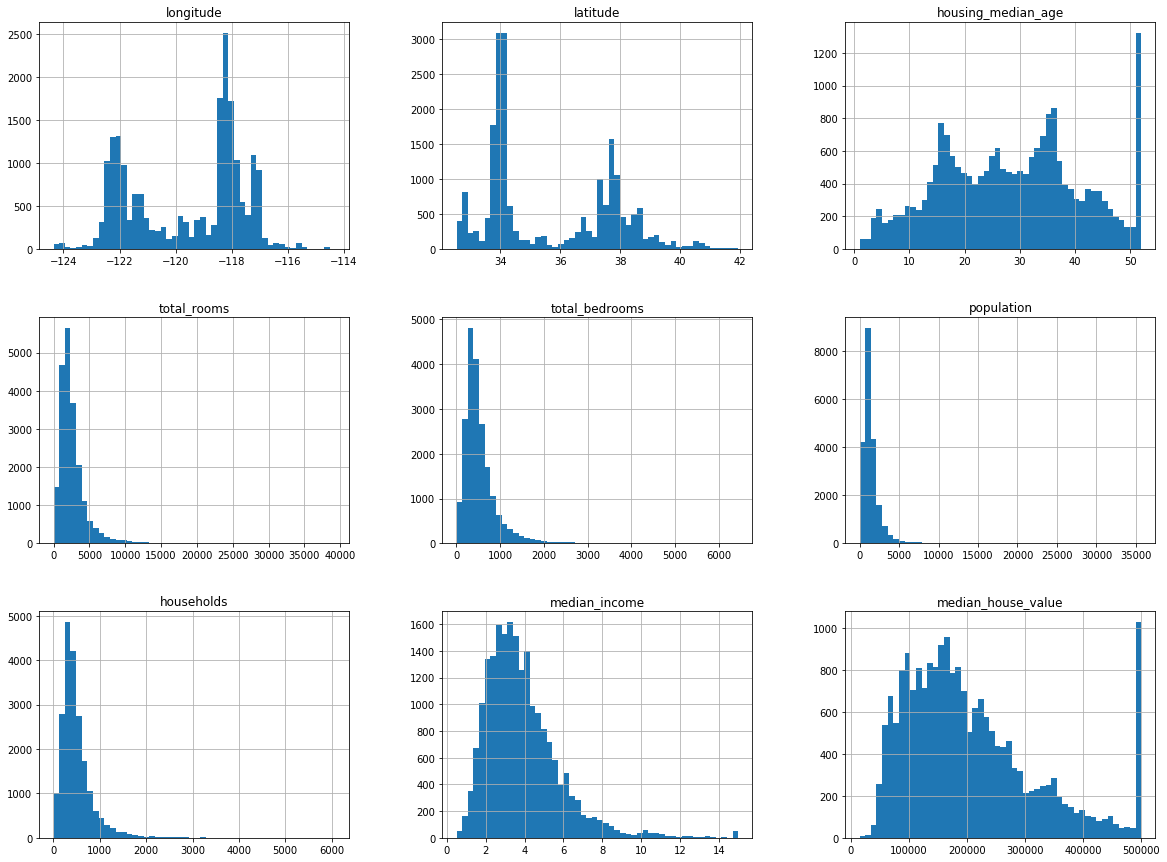

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Bivariate plots: We'll use seaborn library

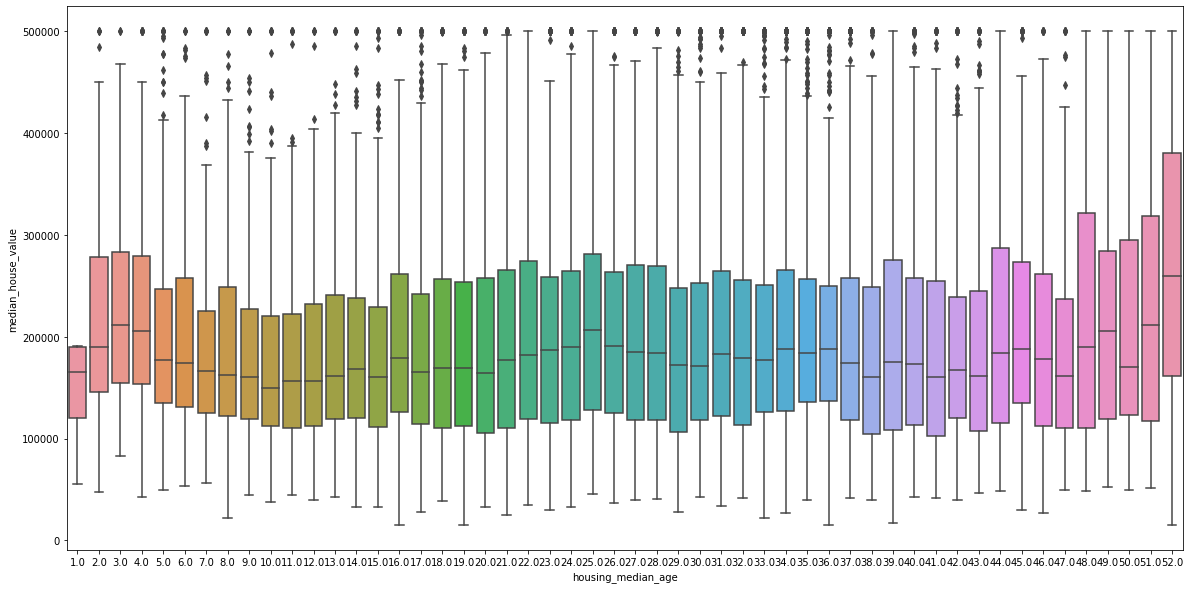

In [15]:
import seaborn as sns
f,ax= plt.subplots(figsize=(20,10))
fig= sns.boxplot(x='housing_median_age', y='median_house_value',data=housing)

Can you list down some observations from the histograms?

#### Correlation check
Correlation explains how one or more variables are related to each other. 

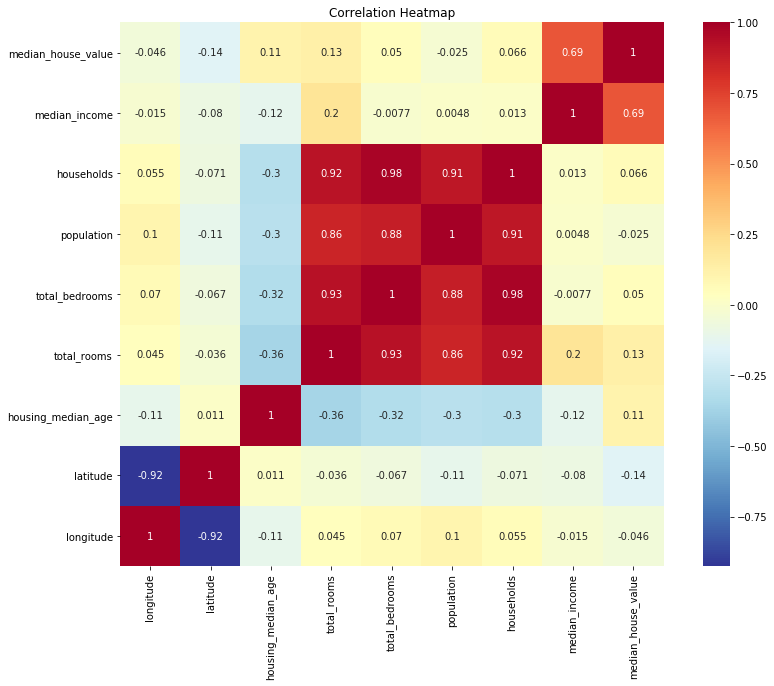

In [16]:
#####Correlation Heatmap#####
housing_corrs= housing.corr()
f,ax= plt.subplots(figsize=(14,10))
sns.heatmap(housing_corrs, cmap = plt.cm.RdYlBu_r, annot = True,square=True)
ax.set_ylim([0,9])
plt.title('Correlation Heatmap');

Scatter Plot of variable vs. target variable

Text(0.5, 0, 'Median Income in thousands')

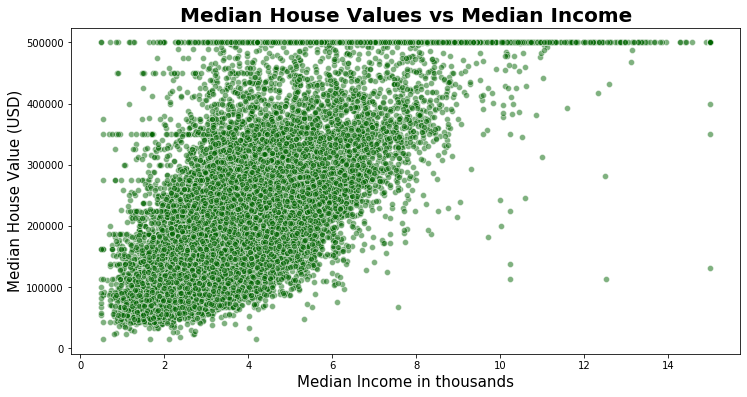

In [17]:
# Plotting the median house value vs Median Income, that seems to be the strongest relationship

plt.figure(figsize = (12,6))
plt.title("Median House Values vs Median Income", fontsize = 20, fontweight = 'bold')
sns.scatterplot(data = housing, y = 'median_house_value', x = 'median_income', alpha = 0.5, color = 'darkgreen')
plt.ylabel("Median House Value (USD)", fontsize = '15')
plt.xlabel("Median Income in thousands", fontsize = '15')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217149A9B48>,
      dtype=object)

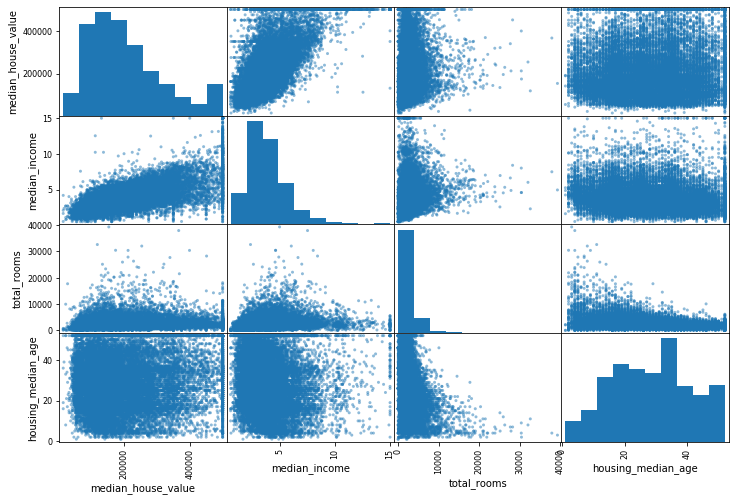

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

Categorical Variable plot

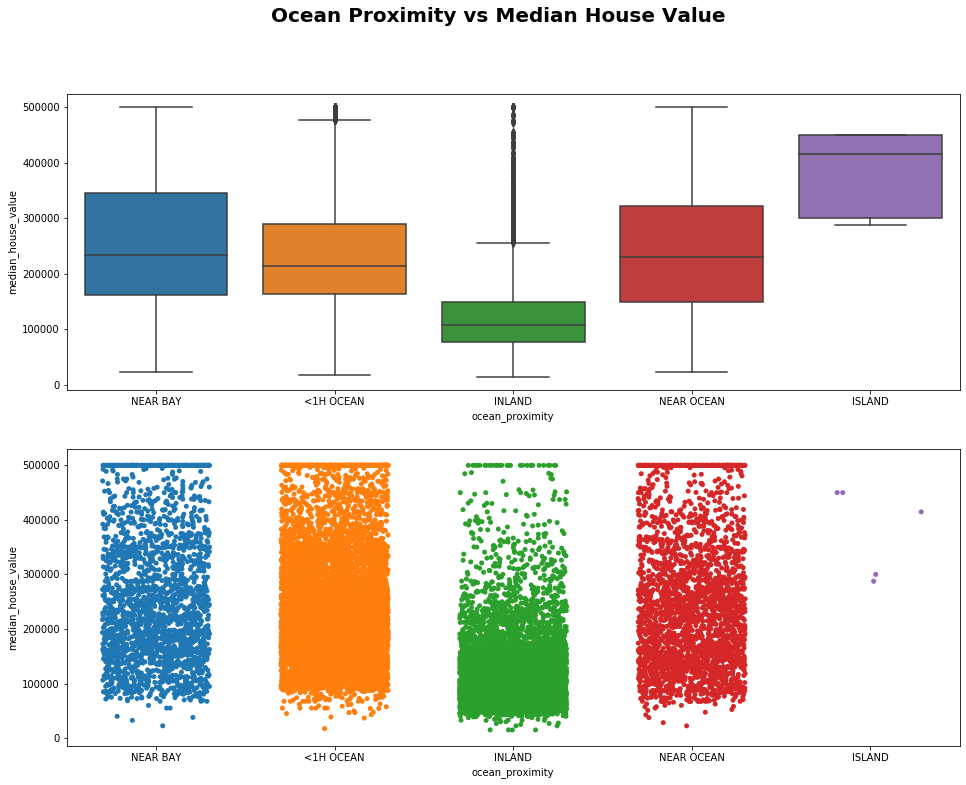

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

plt.suptitle('Ocean Proximity vs Median House Value', fontsize = 20, fontweight = 'bold')
sns.boxplot(ax=axes[0], data = housing, x="ocean_proximity", y="median_house_value")
sns.stripplot(ax=axes[1], data = housing, x='ocean_proximity',y='median_house_value',jitter=0.3)
plt.show();

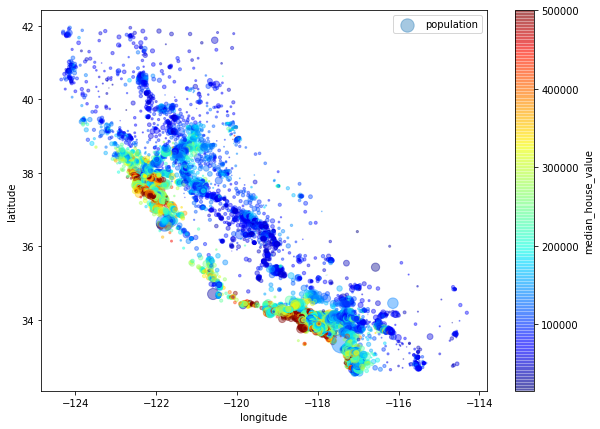

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

##### <center> Data preprocessing for ML models<center>
    
https://scikit-learn.org/stable/modules/preprocessing.html?highlight=standard%20scalar

##### Encoding categorical variables

#### One hot encoding

<div>
   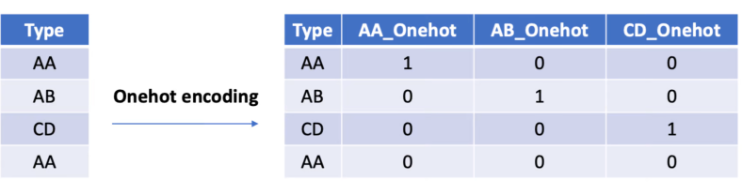
</div>

#### Label encoding

<div>
   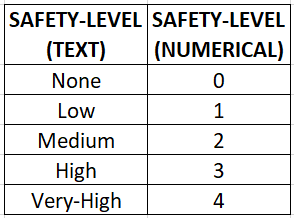
</div>

#### Standardization

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.


In [75]:
from sklearn.preprocessing import StandardScaler

In [21]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
print(housing["ocean_proximity"].value_counts())
housing["ocean_proximity"] = labelEncoder.fit_transform(housing["ocean_proximity"])
print(housing["ocean_proximity"].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64
0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64


##### Data Cleaning
We saw above that there are missing values. There can be multiple options:

- housing.dropna(subset=["total_bedrooms"])    # option 1
- housing.drop("total_bedrooms", axis=1)       # option 2
- median = housing["total_bedrooms"].median()  # option 3
- housing["total_bedrooms"].fillna(median, inplace=True)


- from sklearn.impute import SimpleImputer
- imputer = SimpleImputer(strategy="median") or strategy="mean"

In [22]:
housing['total_bedrooms'] = housing['total_bedrooms'].fillna((housing['total_bedrooms'].median()))

In [23]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Outlier check:
Outlier is an unusual observation that is not consistent with the remaining observations in a sample dataset.
There are ways to check outliers:Histograms, Boxplot,Scatterplots, Interquartile ranges and statistical tests: Dixon's, Grubs etc.



Now We've got some understanding of the data. Let's create a test set.

In [91]:
from sklearn.model_selection import ShuffleSplit,train_test_split
########################################

X = housing.loc[:,housing.columns != 'median_house_value']
Y = housing.loc[:,'median_house_value']

## Creating a validation dataset (Holdout sample####)
seed = 9
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [92]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
print('Training label size:', y_train.shape)
print('Test label size:', y_test.shape)

Training data size: (16512, 9)
Test data size: (4128, 9)
Training label size: (16512,)
Test label size: (4128,)


In [93]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,"16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00"
mean,-119.58,35.64,28.64,"2,630.41",536.00,"1,421.94",498.53,3.86,1.17
std,2.01,2.14,12.61,"2,167.05",419.95,"1,131.71",382.10,1.90,1.42
min,-124.35,32.54,1.00,2.00,2.00,3.00,2.00,0.50,0.00
25%,-121.80,33.93,18.00,"1,449.00",297.00,787.00,279.00,2.56,0.00
50%,-118.50,34.26,29.00,"2,123.00",435.00,"1,164.00",408.00,3.53,1.00
75%,-118.01,37.72,37.00,"3,142.00",642.00,"1,715.00",604.00,4.73,1.00
max,-114.31,41.95,52.00,"32,627.00","6,445.00","35,682.00","6,082.00",15.00,4.00


In [94]:
X_test.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,"4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00"
mean,-119.54,35.60,28.62,"2,657.17",540.20,"1,439.61",503.60,3.90,1.15
std,1.99,2.12,12.50,"2,239.05",417.19,"1,135.50",383.25,1.90,1.41
min,-124.25,32.56,2.00,8.00,1.00,8.00,1.00,0.50,0.00
25%,-121.78,33.93,18.00,"1,442.00",299.00,787.50,282.00,2.60,0.00
50%,-118.47,34.25,29.00,"2,148.50",439.00,"1,174.00",418.00,3.57,1.00
75%,-117.99,37.70,37.00,"3,165.00",648.00,"1,763.25",607.00,4.79,1.00
max,-114.49,41.86,52.00,"39,320.00","6,210.00","16,305.00","5,358.00",15.00,4.00


### Standardization

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [105]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### <center>Model Training<center>

In [106]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_sc, y_train)

LinearRegression()

In [107]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(X_test_sc)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

70217.76230734315

In [108]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, housing_predictions)
lin_mae

50783.61600364632

In [109]:
sklearn.metrics.r2_score(y_test, housing_predictions, sample_weight=None, multioutput='uniform_average')

0.63294860720854

In [110]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [111]:
housing_predictions_tree = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, housing_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

67814.39873019833

In [34]:
tree_mae = mean_absolute_error(y_test, housing_predictions_tree)
tree_mae

43229.6441375969

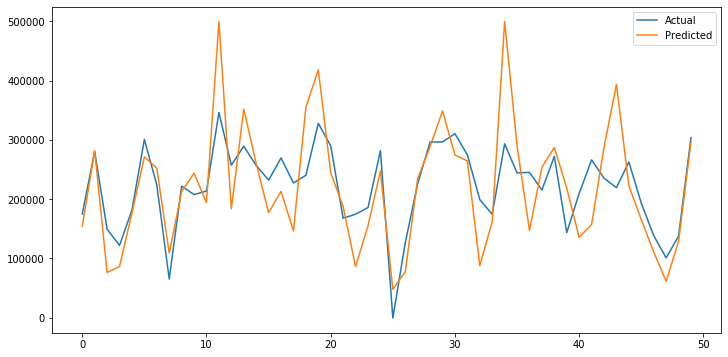

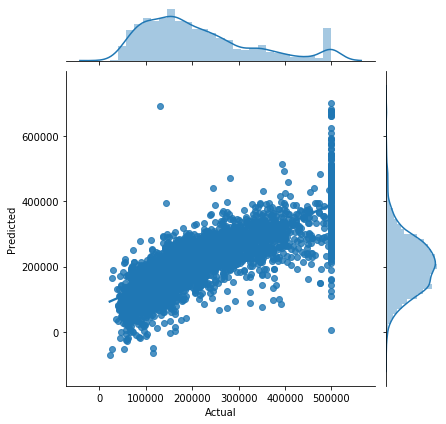

In [112]:
test = pd.DataFrame({'Predicted':housing_predictions,'Actual':y_test})
fig= plt.figure(figsize=(12,6))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [67]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [71]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
lassoreg=Lasso(alpha=0.001,normalize=True)
lassoreg.fit(X_train,y_train)

print(sqrt(mean_squared_error(y_test,lassoreg.predict(X_test))))
print('R2 Value/Coefficient of determination:{}'.format(lassoreg.score(X_test,y_test)))

70217.75937744239
R2 Value/Coefficient of determination:0.6329486378396536


In [72]:
ridgereg=Ridge(alpha=0.001,normalize=True)
ridgereg.fit(X_train,y_train)
             
print(sqrt(mean_squared_error(y_test,ridgereg.predict(X_test))))
print('R2 Value/Coefficient of determination:{}'.format(ridgereg.score(X_test,y_test)))

70228.36751724583
R2 Value/Coefficient of determination:0.6328377249788066


#### <center> Model Persistence & Deployment<center>

In [36]:
import joblib

In [38]:
joblib.dump(lin_reg, 'C:/Users/KHURANA0/Desktop/ML model/reg_model_joblib')

['C:/Users/KHURANA0/Desktop/ML model/reg_model_joblib']

In [40]:
# opening the file- reg_model_joblib
m_jlib = joblib.load('C:/Users/KHURANA0/Desktop/ML model/reg_model_joblib')

In [43]:
# check prediction- Should match the above linear model predictions
jlib_predictions=m_jlib.predict(X_test)

In [45]:
lin_mae1 = mean_absolute_error(y_test, jlib_predictions)
lin_mae1

50783.61600364684

### Cross Validation
Better way to evaluate ML model

<div>
   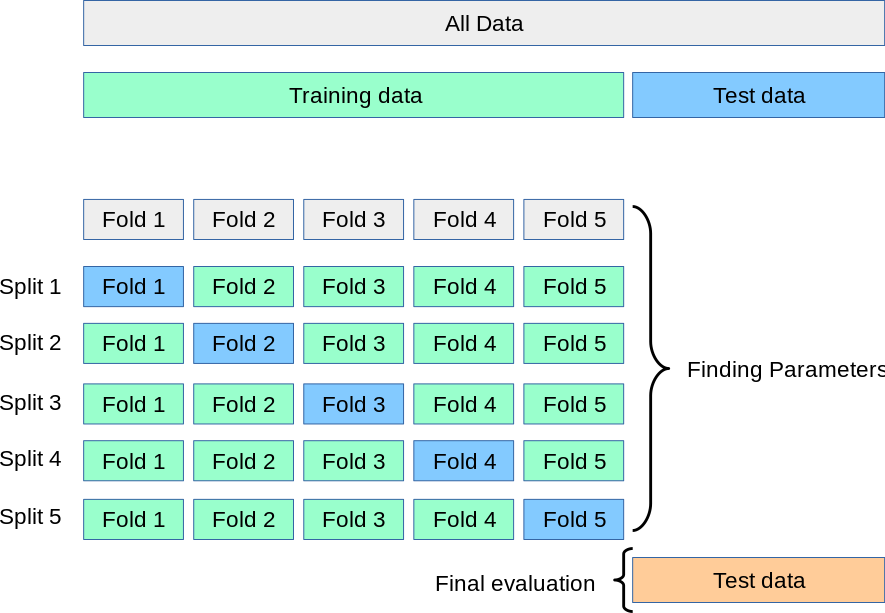
</div>

Cross Validation workflow for parameter tuning & validation

<div>
   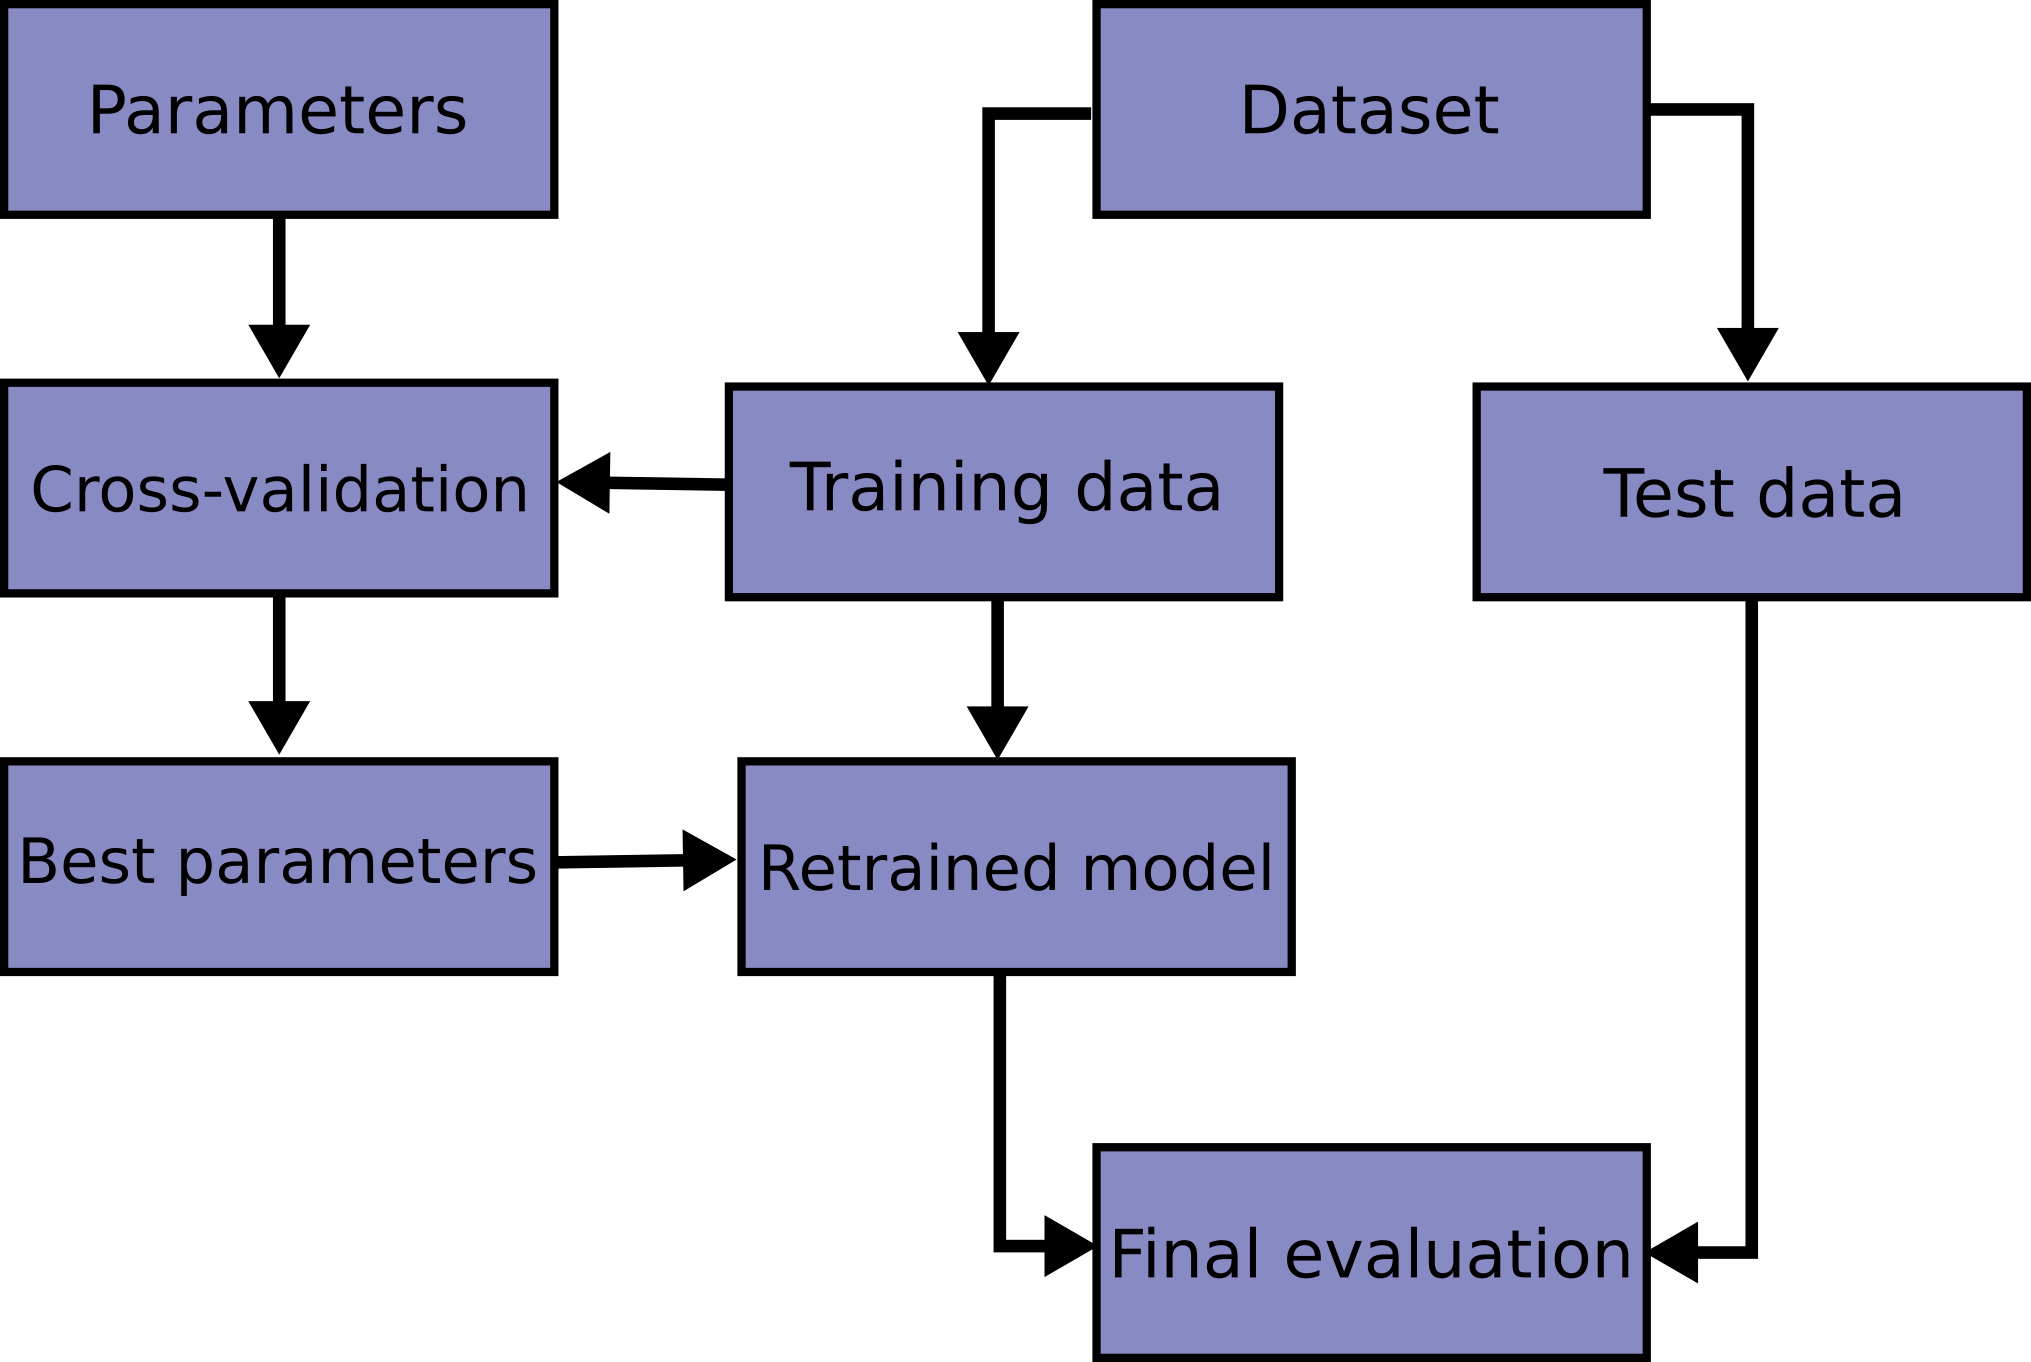
</div>

In [ ]:
from sklearn.model_selection import cross_val_score
scores

In [113]:
scores = cross_val_score(lin_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10)

In [114]:
lin_reg_rmse_scores = np.sqrt(-scores)

In [115]:
lin_reg_rmse_scores

array([69644.38215002, 68359.42611793, 71338.04839972, 69875.3783551 ,
       70990.26091927, 68632.6218996 , 67539.15737507, 72938.60467893,
       68973.85077746, 68756.86970512])

In [117]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_reg_rmse_scores)

Scores: [69644.38215002 68359.42611793 71338.04839972 69875.3783551
 70990.26091927 68632.6218996  67539.15737507 72938.60467893
 68973.85077746 68756.86970512]
Mean: 69704.8600378203
Standard deviation: 1545.7235657680721


#### Repeated K fold cross validation

In [120]:
from sklearn.model_selection import RepeatedKFold
random_state = 1288
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=random_state)
scores_rkfold = cross_val_score(lin_reg, X_train, y_train, scoring='r2', cv=rkf)

In [122]:
display_scores(scores_rkfold)

Scores: [0.65278255 0.64081546 0.63601328 0.66098104 0.6240039  0.61176302
 0.58430288 0.6633552  0.65397673 0.61396236 0.63679878 0.63787036
 0.65336503 0.63624052 0.63034018 0.60517436 0.64151167 0.63025186
 0.62441363 0.64723612 0.61893762 0.64820528 0.66355584 0.64118151
 0.63820315 0.64241793 0.62384811 0.6284788  0.60993626 0.624285
 0.66391598 0.64010132 0.60603581 0.63677467 0.62757206 0.64298875
 0.61907479 0.62522486 0.65631432 0.6227489  0.62087114 0.63428755
 0.63974092 0.65154242 0.62696806 0.63731737 0.6524941  0.63597843
 0.62163378 0.62285976]
Mean: 0.63417306832605
Standard deviation: 0.016525832627660674


#### <center> Model development best practices <center>
- In practice, if there is enough data, we can create a validation set that can be used for additional testing. This set is never used in training and even as a part of holdout set. This is to mimic the performance of the model in production.
- If we don't have enough data, then there can just be 1 training & 1 validation set.Cross validation becomes really imp here.
- The entire pipeline(all above preprocessing steps and custom transformers(encoders/scalars)) is developed using training dataset and the same pipeline is applied on the validation set. This prepares the dataset which is the scored using an already persisted model.

#### <center>Model Improvements/ Exercise <center>
- Feature Engineering- e.g. population_per_household
- Different categorical encoding
- Log of input features
- Try a powerful algo: XGBoost, Neural network or Random forest
- Perform Model fine tuning
- Create a geographic cluster